/content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP
['dataname', 'X', 'y']
Size of X is 45546-by-300
Size of y is (45546,)
Iter 0, L2 norm of gradient = 0.6144473558892748
Iter 1, L2 norm of gradient = 0.18106149647802636
Iter 2, L2 norm of gradient = 0.07386879647522486
Iter 3, L2 norm of gradient = 0.03019868640498542
Iter 4, L2 norm of gradient = 0.01163094116253909
Iter 5, L2 norm of gradient = 0.003781141574076269
Iter 6, L2 norm of gradient = 0.0008230926748247644
Iter 7, L2 norm of gradient = 6.933635870375359e-05
Iter 8, L2 norm of gradient = 6.754778772801032e-07
Iter 9, L2 norm of gradient = 7.23333738994331e-11
Iter 10, L2 norm of gradient = 3.616784127053577e-11
Iter 11, L2 norm of gradient = 1.8084498208993953e-11
Iter 12, L2 norm of gradient = 9.04253298054991e-12
Iter 13, L2 norm of gradient = 4.521416659145695e-12
Iter 14, L2 norm of gradient = 2.260777223565753e-12
Iter 15, L2 norm of gradient = 1.1304266479301103e-12
Iter 16, L2 norm of gradient = 5.652291559894

/content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP/Algorithm/ExecutorLogistic.py:143: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha_lstsq = np.linalg.lstsq(Y.astype(np.float64), gVec.astype(np.float64))[0].astype(self.dtype_)


residual norm: 0.6144473558892748
Newton basis: columnwise_norm:  [0.70852299 0.51154929 0.36949547]
shape (300, 3)
singular values [1.73190389e+00 2.25561281e-02 3.64542345e-04]
norm(solution_lstsq-solutionqr) 8.942682099218629e-13

Hessian info: cond_number : 7223.150831953996
sigular values :  0.7223150831953595 9.999999999999445e-05
float64
theoretical upper bound 1.8636681180605743

Newton-GMRES solution: [  25.80373139 -167.91651341  185.66624767]
Length of ptilde: 6.029790934799612 rtilde 3.3939975013184993
theory_Upper_Bound: 1.8636681180605743
Newton-GMRES gain: 0.02659551849787084
AAP gain 0.02814936280292341
sigular values of M_t [1.72245445 0.18174877 0.01086514]

SY Convergence
lr 1.0
S[0]-lr*f_t 0.0
(S[0]-lr*f_t)/|f_t|(floating error occur): 0.0


/content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP/Algorithm/ExecutorLogistic.py:237: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution_lstsq  = numpy.linalg.lstsq(basis.astype(np.float64), b.astype(np.float64))[0]


Y_error [0.15727962 0.0687768  0.01074821] 
S_error [0.         0.15727962 0.22599962] 
ASY_error [0.15727962 0.18117284 0.15256463] 
singular values of G_t [1.61125566 0.63545292 0.00740205]

============== Iteration 2: ====err=0.9285872839596402=========
0.04281325077211103
0.04149085395082675
0.04026283562715818
0.03911946993017633
norm(solution_lstsq-solutionqr) 5.093170329928398e-11 qr 91627.5382800714 qr_normalization 91627.53828007108 lstsq 91627.53828007144
AAP LS solution: [-33656.17901437  74593.42580731 -41215.14541703]
Length of ptilde: 5.682229048695845 rtilde 0.006378622319810294
columnwise_norm: Y, b [0.00141063 0.00131445 0.00122805] 0.04281325077211103
sigular values of Y [1.73203991e+00 6.14387211e-03 8.40942695e-05]


columnwise_norm: S [0.04281325 0.04149085 0.04026284]
iterations [2.571028   2.61043301 2.64856796 2.68551917] 
local_gradients [0.04281325 0.04149085 0.04026284 0.03911947]

Newton-GMRES
residual norm: 0.04281325077211103
Newton basis: columnwise_norm:

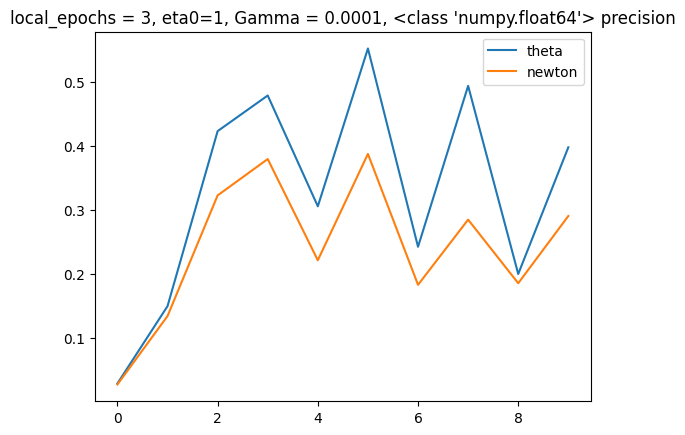

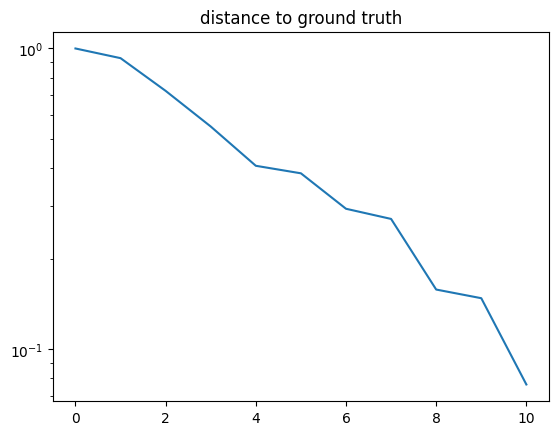

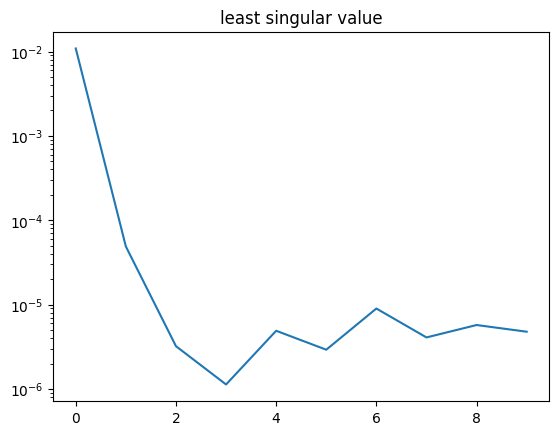

0 time used:    16.034798860549927


In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP


import numpy as np
from scipy import optimize
import numpy
import time
import matplotlib.pyplot as plt
import sys
import matplotlib.pyplot as plt
import numpy as np

import Util.Logistic as Logistic
from Algorithm.Solver import Solver as Solver_AAP




class Demo:
    def __init__(self, maxiter, repeat, gamma, solver,dtype_):
        self.maxiter = maxiter
        self.repeat = repeat
        self.gamma = gamma
        self.solver = solver
        self.dtype_ = dtype_

    #fit is a function to compute the global minimizer
    def fit(self, xMat, yVec):
        n, self.d = xMat.shape
        self.xMat = xMat[0:n, :].astype(np.float64)
        self.yVec = yVec[0:n].reshape(n, 1).astype(np.float64)
        self.n = n


        #compute the global minimizer
        solver = Logistic.Solver(X=self.xMat, y=self.yVec)
        self.wopt, self.condnum = solver.newton(self.gamma)

        print('the condition number is ',self.condnum)
        print('current xMat shape', self.xMat.shape)


    def testConvergence(self, isSearch=False,newtoniter=100):
        errMat = numpy.zeros((self.repeat*6, self.maxiter+1))
        cur = 0
        for r in range(self.repeat):
            print(str(r) + '-th repeat  ')




            solver = Solver_AAP(local_epochs = 3, eta0=1, C=0, dtype_ = self.dtype_)
            np.random.seed(42)
            solver.fit(self.xMat, self.yVec)
            start_time = time.time()
            err = solver.train(self.gamma, self.wopt, maxIter=self.maxiter, isSearch=isSearch,  newtonMaxIter=newtoniter)

            import matplotlib.pyplot as plt
            plt.plot(solver.thetaList, label ='theta'  )
            plt.plot(solver.newtongainList, label='newton')
            plt.legend()
            plt.title(f'local_epochs = 3, eta0=1, Gamma = {self.gamma}, {self.dtype_} precision'  )
            plt.show()

            plt.semilogy( err )
            plt.title('distance to ground truth')
            plt.show()

            plt.semilogy( solver.sigmaList )
            plt.title('least singular value')
            plt.show()

            print(cur, 'time used:   ' ,time.time() - start_time)
            del solver
            l = min(len(err), self.maxiter+1)
            errMat[cur, 0:l] = err[0:l]
            cur = cur+1








        return errMat


def loadData(filename):

    npzfile = numpy.load(filename)
    print(npzfile.files)
    X = npzfile['X']
    y = npzfile['y']
    n, d = X.shape
    #X = numpy.concatenate((X, numpy.ones((n, 1))), axis=1)
    print('Size of X is ' + str(n) + '-by-' + str(d))
    print('Size of y is ' + str(y.shape))
    return X, y




if __name__ == '__main__':
    MaxIter = 10
    Repeat = 1
    Gamma = 1e-4
    IsSearch = False
    NewtonIter = 10
    Dtype_ = np.float64

    filename = '/content/drive/MyDrive/Colab Notebooks/AA/github/GIANT/Resource/w8a.npz'
    xMat, yVec = loadData(filename)



    demo = Demo(MaxIter, Repeat, Gamma, None, Dtype_)
    demo.fit(xMat, yVec)
    errMat = demo.testConvergence(isSearch=IsSearch,  newtoniter=NewtonIter)

    #numpy.set_printoptions(threshold=sys.maxsize)
    #print(errMat)




In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP


import numpy as np
from scipy import optimize
import numpy
import time
import matplotlib.pyplot as plt
import sys
import matplotlib.pyplot as plt
import numpy as np

import Util.Logistic as Logistic
from Algorithm.Solver import Solver as Solver_AAP




class Demo:
    def __init__(self, maxiter, repeat, gamma, solver,dtype_):
        self.maxiter = maxiter
        self.repeat = repeat
        self.gamma = gamma
        self.solver = solver
        self.dtype_ = dtype_

    #fit is a function to compute the global minimizer
    def fit(self, xMat, yVec):
        n, self.d = xMat.shape
        self.xMat = xMat[0:n, :].astype(np.float64)
        self.yVec = yVec[0:n].reshape(n, 1).astype(np.float64)
        self.n = n


        #compute the global minimizer
        solver = Logistic.Solver(X=self.xMat, y=self.yVec)
        self.wopt, self.condnum = solver.newton(self.gamma)

        print('the condition number is ',self.condnum)
        print('current xMat shape', self.xMat.shape)


    def testConvergence(self, isSearch=False,newtoniter=100):
        errMat = numpy.zeros((self.repeat*6, self.maxiter+1))
        cur = 0
        for r in range(self.repeat):
            print(str(r) + '-th repeat  ')




            solver = Solver_AAP(local_epochs = 3, eta0=1, C=0, dtype_ = self.dtype_)
            np.random.seed(42)
            solver.fit(self.xMat, self.yVec)
            start_time = time.time()
            err = solver.train(self.gamma, self.wopt, maxIter=self.maxiter, isSearch=isSearch,  newtonMaxIter=newtoniter)

            import matplotlib.pyplot as plt
            plt.plot(solver.thetaList, label ='theta'  )
            plt.plot(solver.newtongainList, label='newton')
            plt.legend()
            plt.title(f'local_epochs = 3, eta0=1, Gamma = {self.gamma}, {self.dtype_} precision'  )
            plt.show()

            plt.semilogy( err )
            plt.title('distance to ground truth')
            plt.show()

            plt.semilogy( solver.sigmaList )
            plt.title('least singular value')
            plt.show()

            print(cur, 'time used:   ' ,time.time() - start_time)
            del solver
            l = min(len(err), self.maxiter+1)
            errMat[cur, 0:l] = err[0:l]
            cur = cur+1




        return errMat


def loadData(filename):

    npzfile = numpy.load(filename)
    print(npzfile.files)
    X = npzfile['X']
    y = npzfile['y']
    n, d = X.shape
    #X = numpy.concatenate((X, numpy.ones((n, 1))), axis=1)
    print('Size of X is ' + str(n) + '-by-' + str(d))
    print('Size of y is ' + str(y.shape))
    return X, y




if __name__ == '__main__':
    MaxIter = 5
    Repeat = 1
    Gamma = 1e-3
    IsSearch = False
    NewtonIter = 10
    Dtype_ = np.longdouble

    filename = '/content/drive/MyDrive/Colab Notebooks/AA/github/GIANT/Resource/w8a.npz'
    xMat, yVec = loadData(filename)



    demo = Demo(MaxIter, Repeat, Gamma, None, Dtype_)
    demo.fit(xMat, yVec)
    errMat = demo.testConvergence(isSearch=IsSearch,  newtoniter=NewtonIter)

    #numpy.set_printoptions(threshold=sys.maxsize)
    #print(errMat)




/content/drive/MyDrive/Colab Notebooks/AA/github_main/AAP
['dataname', 'X', 'y']
Size of X is 45546-by-300
Size of y is (45546,)
Iter 0, L2 norm of gradient = 0.6144473558892748
Iter 1, L2 norm of gradient = 0.17915568061878823
Iter 2, L2 norm of gradient = 0.07157693105456453
Iter 3, L2 norm of gradient = 0.027732269898004876
Converged! res = 4.108566342159599e-34
Iter 4, L2 norm of gradient = 0.009138883107938912
Converged! res = 7.465064003955434e-35
Iter 5, L2 norm of gradient = 0.001914377042876695
Converged! res = 3.328874797994055e-36
Iter 6, L2 norm of gradient = 0.00012982991286336572
Converged! res = 7.773883859892706e-39
Iter 7, L2 norm of gradient = 6.95524083185222e-07
Converged! res = 2.920510792686446e-43
Iter 8, L2 norm of gradient = 2.0577683873300596e-11
Converged! res = 3.812497836375225e-52
Iter 9, L2 norm of gradient = 1.0288856375709759e-11
Converged! res = 9.528746959666995e-53
Iter 10, L2 norm of gradient = 5.14442035748012e-12
Converged! res = 2.383329481997427